<a href="https://colab.research.google.com/github/anu-tiwari/ML2022/blob/main/MLLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download data from https://www.kaggle.com/competitions/quora-question-pairs/data.

Key features of the data :
Data is labeled - Binary Classification () problem

Labels have been supplied by humans, so truth labels are inherently subjective. Therefore, the labels on this dataset should be taken as informed and not 100% accurate.

Problem Statement

Given two questions we have to classify whether they are duplicates or not

Eda: (24/8/22)
- Read the data using pandas
- Drop the id column
- Sample 20 values
- Find the total number of question pairs
- Get summary statistics
- Find the number of null rows and remove them (or columns too)
- Find the total number of duplicate pairs and non-duplicate pairs.
- Bar plot based on is_duplicate flag
- Log plot of the number of questions vs count based on qid.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/quora-question-pairs/data' 

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anushatiwari
Your Kaggle Key: ··········


100%|██████████| 309M/309M [00:05<00:00, 63.5MB/s]



Extracting archive ./quora-question-pairs/quora-question-pairs.zip to ./quora-question-pairs


In [ ]:
data_dir = './quora-question-pairs'

In [ ]:
import os
os.listdir(data_dir)

['sample_submission.csv.zip', 'test.csv', 'test.csv.zip', 'train.csv.zip']

###1. Read the data using pandas

In [ ]:
test_data = pd.read_csv("./quora-question-pairs/test.csv")
train_data = pd.read_csv("./quora-question-pairs/train.csv.zip")
sample_data = pd.read_csv("./quora-question-pairs/sample_submission.csv.zip")
testzip_data = pd.read_csv("./quora-question-pairs/test.csv.zip", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
test_data

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
2345791,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2345794,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [ ]:
train_data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
sample_data

,test_id,is_duplicate
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
2345791,2345791,1
2345792,2345792,1
2345793,2345793,1
2345794,2345794,1


In [ ]:
testzip_data

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
3563470,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
3563471,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
3563472,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
3563473,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


###2. Drop the id column


In [ ]:
train_data = train_data.drop(columns=['id'])
train_data

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,537928,537929,What is one coin?,What's this coin?,0
404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


###3. Sample 20 values

In [ ]:
train_data.sample(20)

,qid1,qid2,question1,question2,is_duplicate
178925,9273,94258,What are examples of sentences using the word ...,What are some examples of sentences using the ...,0
3485,6905,6906,Why did you stop writing your blog for a long ...,Why did you stop writing at blog?,0
180965,277333,277334,Do people still actually believe in heaven?,Why do people believe in heaven and hell?,0
392544,525247,17427,Do over the counter markets dominate the serio...,How do you buy penny stocks on E-Trade?,0
231670,341535,341536,Can you detox your body of sodium lauryl sulfate?,What is sodium lauryl sulfate?,0
95835,159742,159743,Most used research in comp csi.?,"Why is on right wing of a plane, there is Gree...",0
253676,178460,368258,Is this a German Shepherd dog?,How do you properly groom German Shepherd dogs?,0
103108,100214,91067,How often should you wash your hair?,"How often should you wash your hair, and why?",1
74371,127468,127469,Why do psychopaths stare so intently?,Are psychopaths sarcastic people?,0
320562,446132,371223,What is the best Winston Churchill book for so...,What is the best book or documentary to learn ...,0


###4. Find the total number of question pairs

In [ ]:
train_data.shape[0]

404290

###5. Get summary statistics

In [ ]:
train_data[["qid1", "qid2", "is_duplicate"]].describe()

,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000
mean,217243.942418,220955.655337,0.369198
std,157751.700002,159903.182629,0.482588
min,1.000000,2.000000,0.000000
25%,74437.500000,74727.000000,0.000000
50%,192182.000000,197052.000000,0.000000
75%,346573.500000,354692.500000,1.000000
max,537932.000000,537933.000000,1.000000


###6. Find the number of null rows and remove them (or columns too)

In [ ]:
train_data.isna().sum()

qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
train_data = train_data.dropna(how='any')
train_data

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,537928,537929,What is one coin?,What's this coin?,0
404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


###7. Find the total number of duplicate pairs and non-duplicate pairs.

In [ ]:
series = train_data.apply(lambda x : True if x['is_duplicate'] == 1 else False, axis = 1)
series

0         False
1         False
2         False
3         False
4         False
          ...  
404285    False
404286     True
404287    False
404288    False
404289    False
Length: 404287, dtype: bool

In [ ]:
true_count = len(series[series == True])
false_count = len(series[series == False])
print("Number of duplicates are", true_count)
print("Number of non duplicates are", false_count)

Number of duplicates are 149263
Number of non duplicates are 255024


###8. Bar plot based on is_duplicate flag

In [ ]:
# is_duplicate_seg = train_data.groupby(['is_duplicate']).size().reset_index(name='count')
# is_duplicate_seg
is_duplicate_seg = train_data["is_duplicate"].value_counts().reset_index(name="count")
is_duplicate_seg

,index,count
0,0,255024
1,1,149263


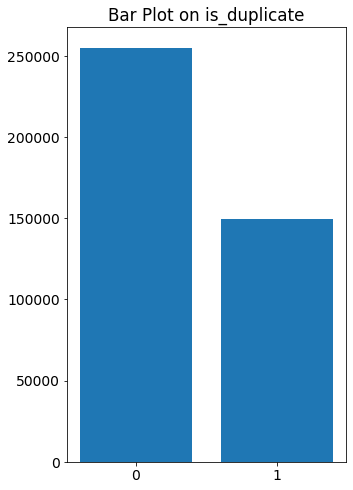

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (5, 8)
plt.title("Bar Plot on is_duplicate")
plt.bar(range(is_duplicate_seg.shape[0]), is_duplicate_seg['count'], tick_label=is_duplicate_seg['index'])
plt.show()

###9. Log plot of the number of questions vs count based on qid.

In [ ]:
df1 = train_data[["qid1", "question1"]]
df2 = train_data[["qid2", "question2"]]

In [ ]:
df1.rename(columns={"qid1":"qid", "question1":"question"}, inplace=True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,qid,question
0,1,What is the step by step guide to invest in sh...
1,3,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,5,How can I increase the speed of my internet co...
3,7,Why am I mentally very lonely? How can I solve...
4,9,"Which one dissolve in water quikly sugar, salt..."
...,...,...
404285,433578,How many keywords are there in the Racket prog...
404286,18840,Do you believe there is life after death?
404287,537928,What is one coin?
404288,537930,What is the approx annual cost of living while...


In [ ]:
df2.rename(columns={"qid2":"qid", "question2":"question"}, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,qid,question
0,2,What is the step by step guide to invest in sh...
1,4,What would happen if the Indian government sto...
2,6,How can Internet speed be increased by hacking...
3,8,Find the remainder when [math]23^{24}[/math] i...
4,10,Which fish would survive in salt water?
...,...,...
404285,379845,How many keywords are there in PERL Programmin...
404286,155606,Is it true that there is life after death?
404287,537929,What's this coin?
404288,537931,I am having little hairfall problem but I want...


In [ ]:
df3 = pd.concat((df1, df2), axis=0)
df3

,qid,question
0,1,What is the step by step guide to invest in sh...
1,3,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,5,How can I increase the speed of my internet co...
3,7,Why am I mentally very lonely? How can I solve...
4,9,"Which one dissolve in water quikly sugar, salt..."
...,...,...
404285,379845,How many keywords are there in PERL Programmin...
404286,155606,Is it true that there is life after death?
404287,537929,What's this coin?
404288,537931,I am having little hairfall problem but I want...


In [ ]:
finaldf = df3["qid"].value_counts().reset_index(name="count")
finaldf

,index,count
0,2559,157
1,30782,120
2,4044,111
3,2561,88
4,14376,79
...,...,...
537924,416446,1
537925,416444,1
537926,416441,1
537927,416439,1


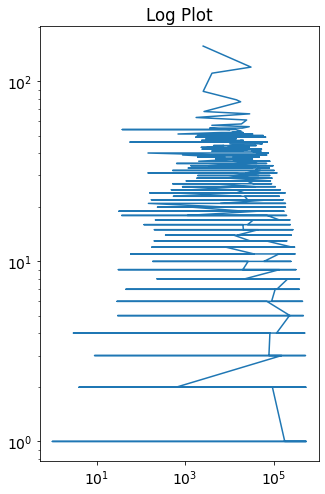

In [ ]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (5, 8)
plt.title("Log Plot")
plt.loglog(finaldf["index"], finaldf["count"])
plt.show()